* ### Loading Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

* ### Loading and Exploring the Dataset.

In [3]:
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944235 entries, 0 to 944234
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           944235 non-null  int64  
 1   Date Rptd       944235 non-null  object 
 2   DATE OCC        944235 non-null  object 
 3   TIME OCC        944235 non-null  int64  
 4   AREA            944235 non-null  int64  
 5   AREA NAME       944235 non-null  object 
 6   Rpt Dist No     944235 non-null  int64  
 7   Part 1-2        944235 non-null  int64  
 8   Crm Cd          944235 non-null  int64  
 9   Crm Cd Desc     944235 non-null  object 
 10  Mocodes         811136 non-null  object 
 11  Vict Age        944235 non-null  int64  
 12  Vict Sex        817640 non-null  object 
 13  Vict Descent    817630 non-null  object 
 14  Premis Cd       944225 non-null  float64
 15  Premis Desc     943668 non-null  object 
 16  Weapon Used Cd  324477 non-null  float64
 17  Weapon Des

In [6]:
data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           133099
Vict Age               0
Vict Sex          126595
Vict Descent      126605
Premis Cd             10
Premis Desc          567
Weapon Used Cd    619758
Weapon Desc       619758
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          875977
Crm Cd 3          941954
Crm Cd 4          944171
LOCATION               0
Cross Street      796643
LAT                    0
LON                    0
dtype: int64

In [7]:
data.duplicated().sum()

0

* ### Data Summery

* Our Dataset contains `944,235` records and `28` Columns.
* We will not be using all the `28` columns, so we'll drop unnecessary ones.
* Some few columns have `Null` values that need to be dealt with.
* Date related columns are not of `Datetime` format, so we will convert them to the proper data type.
* There are no duplicated records.

*****

* ### Data Cleaning

In this section we'll use the previous findings in the data summery to fix our Dataset and make it ready for the Analysis.

In [8]:
# Dropping unnecessary columns

unused_cols = ['TIME OCC','Rpt Dist No','Part 1-2','Mocodes','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street']

In [9]:
data.drop(columns=unused_cols, inplace=True)

In [10]:
# Dealing with Null values
data['Vict Sex'].value_counts()

Vict Sex
M    385769
F    344147
X     87617
H       106
-         1
Name: count, dtype: int64

In [11]:
# We'll populate the "null" values in the "sex" col. with "X" which is unknown 
data['Vict Sex'].fillna('X', inplace=True)

In [12]:
# Replacing the "-" value with "X" too.
data[data['Vict Sex'] == '-'] = 'X'

In [13]:
data['Vict Sex'].isnull().sum()

0

In [14]:
# We'll replacing both "null" and "X" values with "Unknown" in "vict Descent" col. 
data['Vict Descent'].value_counts()

Vict Descent
H    286423
W    190547
B    131747
X     96219
O     74428
A     20617
K      5230
F      4126
C      3836
J      1343
V      1017
I       909
Z       472
P       255
U       196
D        79
G        68
L        66
S        51
-         1
Name: count, dtype: int64

In [15]:
data['Vict Descent'].fillna('Unknown', inplace=True)

In [16]:
data[data['Vict Descent'] == 'X' ] = 'Unknown'
data[data['Vict Descent'] == '-' ] = 'Unknown'

In [17]:
# Dropping "premis" cols "null" values since they won't affect our data.

data.dropna(subset=['Premis Cd','Premis Desc'], inplace=True)

In [18]:
# Replacing "null" values in "weapon" cols with "Unknown".

data['Weapon Used Cd'].fillna('Unknown', inplace=True)

In [19]:
data['Weapon Desc'].fillna('Unknown', inplace=True)

In [20]:
data.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
AREA              0
AREA NAME         0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LOCATION          0
LAT               0
LON               0
dtype: int64

In [21]:
# Dealing with "Date" cols.

(data['Date Rptd']=='Unknown').value_counts()

Date Rptd
False    847700
True      96220
Name: count, dtype: int64

In [22]:
(data['DATE OCC']=='Unknown').value_counts()

DATE OCC
False    847700
True      96220
Name: count, dtype: int64

In [23]:
# Since we have 96220 unknown date values, we will replace them with their precedent good values

data['Date Rptd'].replace('Unknown', method= 'bfill', inplace=True)

In [24]:
data['DATE OCC'].replace('Unknown', method= 'bfill', inplace=True)

In [25]:
# Convert date cols to datetime data type.

data['Date Rptd'] = pd.to_datetime(data['Date Rptd']).dt.strftime('%m/%d/%y')

In [26]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd']).astype('datetime64[ns]')

In [27]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC']).dt.strftime('%m/%d/%y')

In [28]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC']).astype('datetime64[ns]')

In [29]:
data.head()

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,7,Wilshire,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,Unknown,Unknown,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1,Central,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),Unknown,Unknown,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,Unknown,2023-05-10,2020-03-10,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,200907217,2023-05-10,2020-03-10,9,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,Unknown,Unknown,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,6,Hollywood,354,THEFT OF IDENTITY,28,M,H,102.0,SIDEWALK,Unknown,Unknown,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


In [30]:
data.drop(data[data['DR_NO'] == 'Unknown'].index, inplace=True)

In [31]:
data.reset_index(drop=True, inplace=True)

In [32]:
convert_dict = {'DR_NO': 'int64', 'AREA': 'int64', 'Crm Cd': 'int64', 'Vict Age': 'int64', 'LAT': float, 'LON': float}
data = data.astype(convert_dict)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847700 entries, 0 to 847699
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           847700 non-null  int64         
 1   Date Rptd       847700 non-null  datetime64[ns]
 2   DATE OCC        847700 non-null  datetime64[ns]
 3   AREA            847700 non-null  int64         
 4   AREA NAME       847700 non-null  object        
 5   Crm Cd          847700 non-null  int64         
 6   Crm Cd Desc     847700 non-null  object        
 7   Vict Age        847700 non-null  int64         
 8   Vict Sex        847700 non-null  object        
 9   Vict Descent    847700 non-null  object        
 10  Premis Cd       847700 non-null  object        
 11  Premis Desc     847700 non-null  object        
 12  Weapon Used Cd  847700 non-null  object        
 13  Weapon Desc     847700 non-null  object        
 14  Status          847700 non-null  obj

* After finishing data cleaning, our data is now ready for further investigation but first we will save it as a csv file.

In [34]:
data.to_csv('data.csv', index=False)

****

* ### Data Analysis

In this section we will try to answer the following questions to help us better understand our data and derive useful insights. 

* Q1: What are the most common types of crimes reported?
* Q2: Do different areas of the city (indicated by "Rpt Dist No") have higher rates of specific crimes?
* Q3: Do crimes tend to happen more often near certain landmarks or locations?
* Q4: Are there any trends in crime rates over time? 
* Q5: Are there specific days of the week when certain crimes are more frequent? 
* Q6: What is the typical outcome for a reported crime (indicated by "Status Status Desc")?
  

****

### Q1: What are the most common types of crimes reported?

In [35]:
crime_types = data[['Crm Cd','Crm Cd Desc']].value_counts(normalize=True)
crime_types

Crm Cd  Crm Cd Desc                                             
510     VEHICLE - STOLEN                                            0.120195
624     BATTERY - SIMPLE ASSAULT                                    0.087050
354     THEFT OF IDENTITY                                           0.067522
330     BURGLARY FROM VEHICLE                                       0.066902
230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              0.060970
626     INTIMATE PARTNER - SIMPLE ASSAULT                           0.054808
740     VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     0.053551
310     BURGLARY                                                    0.050807
440     THEFT PLAIN - PETTY ($950 & UNDER)                          0.050597
420     THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             0.042536
331     THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         0.038256
341     THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    0.031808
210     ROB

* The most common crime reported is **`VEHICLE - STOLEN`** with **`12%`** share, next comes **`BATTERY - SIMPLE ASSAULT`** with almost **`9%`** share.
* After that comes **`THEFT OF IDENTITY`** and **`BURGLARY FROM VEHICLE`** both with equal share of **`6.7%`**.

****

### Q2: Do different areas of the city (indicated by "AREA NAME") have higher rates of specific crimes?

In [36]:
crime_by_area = data[['AREA NAME','Crm Cd Desc']]
crime_by_area.head()

,AREA NAME,Crm Cd Desc
0,Wilshire,VEHICLE - STOLEN
1,Central,BURGLARY FROM VEHICLE
2,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
3,Hollywood,THEFT OF IDENTITY
4,Southeast,THEFT OF IDENTITY


In [37]:
crime_by_area['AREA NAME'].nunique()

21

In [38]:
top_crime = crime_by_area.groupby('AREA NAME', as_index=False)['Crm Cd Desc'].apply(lambda x: x.value_counts().index[0])
top_crime

,AREA NAME,Crm Cd Desc
0,77th Street,VEHICLE - STOLEN
1,Central,BURGLARY FROM VEHICLE
2,Devonshire,VEHICLE - STOLEN
3,Foothill,VEHICLE - STOLEN
4,Harbor,VEHICLE - STOLEN
5,Hollenbeck,VEHICLE - STOLEN
6,Hollywood,BATTERY - SIMPLE ASSAULT
7,Mission,VEHICLE - STOLEN
8,N Hollywood,VEHICLE - STOLEN
9,Newton,VEHICLE - STOLEN


* The predominant Crime reported in all Areas is **`VEHICLE - STOLEN`**, so there is no specific crime related to a specific Area.

****

### Q3: Do crimes tend to happen more often near certain landmarks or locations?

In [39]:
crime_Location = data[['Crm Cd Desc','Premis Desc']]
crime_Location['No_of_Occ'] = 1
crime_Location.head()

,Crm Cd Desc,Premis Desc,No_of_Occ
0,VEHICLE - STOLEN,STREET,1
1,BURGLARY FROM VEHICLE,BUS STOP/LAYOVER (ALSO QUERY 124),1
2,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),CLOTHING STORE,1
3,THEFT OF IDENTITY,SIDEWALK,1
4,THEFT OF IDENTITY,SINGLE FAMILY DWELLING,1


In [40]:
Top_location = crime_Location.groupby('Premis Desc', as_index=False)['No_of_Occ'].sum().sort_values(by='No_of_Occ', ascending=False).reset_index(drop=True)
Top_location

,Premis Desc,No_of_Occ
0,STREET,229959
1,SINGLE FAMILY DWELLING,156716
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",110426
3,PARKING LOT,61794
4,SIDEWALK,38034
5,OTHER BUSINESS,26715
6,"VEHICLE, PASSENGER/TRUCK",26306
7,GARAGE/CARPORT,17691
8,DRIVEWAY,14783
9,RESTAURANT/FAST FOOD,7580


* It seems like the **`Street`** is the most common place for crime.
* Surprisingly **`Domestic Violence`** is responsible for almost 25 % of the crimes reported.

*****

### Q4: Are there any trends in crime rates over time?

In [41]:
Crime_per_year = data[['Date Rptd','Crm Cd','Crm Cd Desc']]
Crime_per_year['Year'] = Crime_per_year['Date Rptd'].dt.year
Crime_per_year.head()

,Date Rptd,Crm Cd,Crm Cd Desc,Year
0,2020-03-01,510,VEHICLE - STOLEN,2020
1,2020-02-09,330,BURGLARY FROM VEHICLE,2020
2,2023-05-10,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023
3,2022-08-18,354,THEFT OF IDENTITY,2022
4,2023-04-04,354,THEFT OF IDENTITY,2023


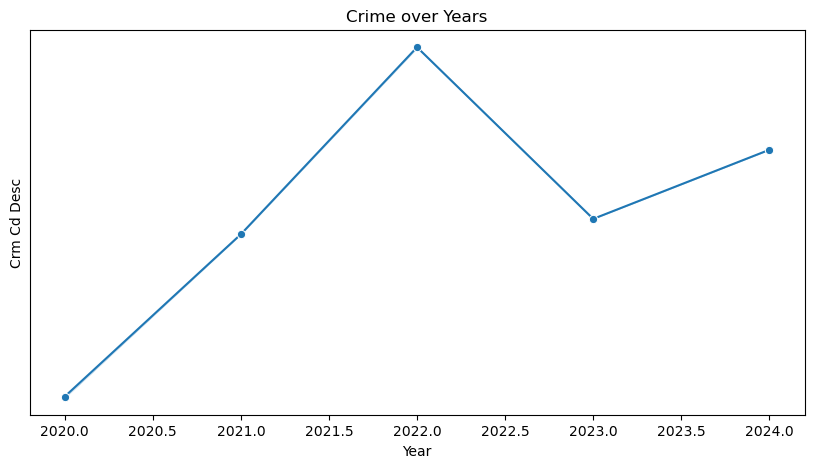

In [42]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x='Year', y='Crm Cd Desc', data=Crime_per_year, ci=False, marker='o' )
plt.title('Crime over Years')
ax.set_yticks([])
plt.show()

* Crimes reported had been steeply risen from **`2020`** till the beginning of **`2022`**.
* Crime reports had started to declined from **`2022`** till the end of the same year.
* From the beginning of **`2023`** ,crime reports have been increasing again.

****

### Q5: Are there specific days of the week when certain crimes are more frequent?

In [43]:
Crime_day = Crime_per_year
Crime_day['Week_Day'] = Crime_day['Date Rptd'].dt.day_name()
Crime_day.head()

,Date Rptd,Crm Cd,Crm Cd Desc,Year,Week_Day
0,2020-03-01,510,VEHICLE - STOLEN,2020,Sunday
1,2020-02-09,330,BURGLARY FROM VEHICLE,2020,Sunday
2,2023-05-10,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023,Wednesday
3,2022-08-18,354,THEFT OF IDENTITY,2022,Thursday
4,2023-04-04,354,THEFT OF IDENTITY,2023,Tuesday


In [44]:
Top_day = Crime_day.groupby('Week_Day', as_index=False)['Crm Cd Desc'].apply(lambda x: x.mode())
Top_day

,Week_Day,Crm Cd Desc
0,Friday,VEHICLE - STOLEN
1,Monday,VEHICLE - STOLEN
2,Saturday,VEHICLE - STOLEN
3,Sunday,VEHICLE - STOLEN
4,Thursday,VEHICLE - STOLEN
5,Tuesday,VEHICLE - STOLEN
6,Wednesday,VEHICLE - STOLEN


* **`VEHICLE - STOLEN`** is the predominant crime regardless of week day, so there is no certain crime associated with a specific weekday.

****

### Q6: What is the typical outcome for a reported crime (indicated by "Status Status Desc")?

In [47]:
crime_report  = data[['Status','Status Desc']]
crime_report.head()

,Status,Status Desc
0,AA,Adult Arrest
1,IC,Invest Cont
2,IC,Invest Cont
3,IC,Invest Cont
4,IC,Invest Cont


In [48]:
crime_report['Status'].nunique()

6

In [56]:
top_outcome = crime_report[['Status','Status Desc']].value_counts().sort_values(ascending=False)
top_outcome

Status  Status Desc 
IC      Invest Cont     674328
AO      Adult Other      98168
AA      Adult Arrest     71053
JA      Juv Arrest        2649
JO      Juv Other         1497
CC      UNK                  5
Name: count, dtype: int64

* The typical outcome of reported crimes is **`investigation continued`** which indicates a strong inefficiency in the system that could need a further   investigation to find out the areas of shortage or negligence.

****